In [221]:
import numpy as np
import pandas as pd
import string
import matplotlib.pyplot as plt
import re
%matplotlib inline

import nltk
from nltk.corpus import stopwords

from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import SimpleRNN

from keras.models import Sequential
from keras.layers.core import Dense,Dropout,Activation,Flatten
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM

In [222]:
# Read data
train = pd.read_csv(r"D:\data mining\HW4\train.csv", sep = '\t')
test = pd.read_csv(r"D:\data mining\HW4\test.csv", sep = '\t')
label = pd.read_csv(r"D:\data mining\HW4\sample_submission.csv", sep = ',')

# Raw Data
raw_train_text = np.array(train['text'])
train_text = np.array(train['text'])
y_train = np.array(train['label'])
raw_test_text = np.array(test['text'])
test_text = np.array(test['text'])
y_test = np.array(label['label'])

In [223]:
# Remove Data Error
for i in range(len(y_train)):
    if y_train[i] =='label':
        y_train[i] = 0.0
    else:
        y_train[i] = float(y_train[i])   

In [224]:
# English stopwords
EngStopWords = set(stopwords.words('english'))

In [225]:
# Data Preprocessing
# - train text data
for i in range(len(raw_train_text)):
    train_text[i] = []
    i_text = re.sub(r'[^\w\s]','',raw_train_text[i]) # Remove Punctuation
    for word in i_text.split(): #Split Sentences
        word = word.lower() # Change to Small Letter
        if word in EngStopWords: # Delete Stopwords
            pass 
        else:
            train_text[i].append(word) 
            
# - test text data
for j in range(len(raw_test_text)):
    test_text[j] = []
    j_text = re.sub(r'[^\w\s]','',raw_test_text[j]) # Remove Punctuation
    for word in j_text.split(): #Split Sentences
        word = word.lower() # Change to Small Letter
        if word in EngStopWords: # Delete Stopwords
            pass 
        else:
            test_text[j].append(word) 

In [226]:
# Token
# Use Tokenizer model to construct token and Build a 5000-word dictionary
token = Tokenizer(num_words=5000) 
# Sort the number of times of each English word appears in the train data
# Top 5000 English words will be added to the dictionary
token.fit_on_texts(train_text)  
# The result of converting English words to numbers
token.word_index 

{'said': 1,
 'one': 2,
 'new': 3,
 'also': 4,
 'time': 5,
 'first': 6,
 'like': 7,
 'people': 8,
 'would': 9,
 'show': 10,
 'two': 11,
 'get': 12,
 'us': 13,
 'years': 14,
 'know': 15,
 '2017': 16,
 'love': 17,
 'back': 18,
 'going': 19,
 'told': 20,
 'im': 21,
 'family': 22,
 'life': 23,
 'year': 24,
 'film': 25,
 'best': 26,
 'think': 27,
 'may': 28,
 'made': 29,
 'dont': 30,
 'season': 31,
 'day': 32,
 'news': 33,
 'last': 34,
 'want': 35,
 'well': 36,
 'together': 37,
 '2018': 38,
 'even': 39,
 'star': 40,
 'make': 41,
 'really': 42,
 'says': 43,
 'series': 44,
 'trump': 45,
 'way': 46,
 'see': 47,
 'since': 48,
 'shes': 49,
 'thats': 50,
 'could': 51,
 'much': 52,
 'world': 53,
 'got': 54,
 'still': 55,
 'things': 56,
 'good': 57,
 'right': 58,
 'go': 59,
 'video': 60,
 'many': 61,
 'relationship': 62,
 'source': 63,
 'later': 64,
 'never': 65,
 'couple': 66,
 'say': 67,
 'york': 68,
 'work': 69,
 'million': 70,
 'wedding': 71,
 'according': 72,
 'three': 73,
 'home': 74,
 'take':

In [228]:
# Convert the text in the train and test data into a digital matrix by texts_to_sequences 
x_train_seq = token.texts_to_sequences(train_text)
x_test_seq = token.texts_to_sequences(test_text)

In [229]:
# Calculate the avg preprocessed text length 
# len(x_train_seq) = 4987
# avg_lengh = 540
lengh = 0
for i in range(len(x_train_seq)):
    lengh = lengh + len(x_train_seq[i])
avg_lengh = int(lengh/len(x_train_seq)) 

In [230]:
# Construct 4987*540 matrix = 4987 texts * 540 digits
# if text length < 540, add 0 to the previous
# if text length > 540, delete the previous
x_train = sequence.pad_sequences(x_train_seq, maxlen = 540)
x_test = sequence.pad_sequences(x_test_seq, maxlen = 540)

In [232]:
# ***** RNN *****
# Construct the Sequential model of Keras 
modelRNN = Sequential()  # Construct model
modelRNN.add(Embedding(output_dim=32, input_dim=5000, input_length=540)) 
# level of Embedding: convert "digit list" to "vector list"
# output dimension is 32, so convert the digit list to 32 dimension vector list
# input dimension is 5000, which dictionary built before is 5000 words
# digit list is 540 digits 

In [233]:
# Add Dropout to avoid overfitting
modelRNN.add(Dropout(0.3))

In [234]:
# RNN layer
modelRNN.add(SimpleRNN(units=16)) # Build an RNN layer of 16 neurons

# Hidden layer
modelRNN.add(Dense(units=256,activation='relu')) # Build a hidden layer of 256 neurons #ReLU activation function
modelRNN.add(Dropout(0.3))

# Output layer
modelRNN.add(Dense(units=1,activation='sigmoid')) # Build a output layer of 1 neuron #Sigmoid activation function

In [235]:
# Model summary
modelRNN.summary()

# Define the train model 
modelRNN.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 
# Loss Function by Cross entropy
# adam is the optimization method to converge faster

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, 540, 32)           160000    
_________________________________________________________________
dropout_16 (Dropout)         (None, 540, 32)           0         
_________________________________________________________________
simple_rnn_7 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_15 (Dense)             (None, 256)               4352      
_________________________________________________________________
dropout_17 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 257       
Total params: 165,393
Trainable params: 165,393
Non-trainable params: 0
________________________________________________

In [236]:
#LossHistory to save loss and accuracy
class LossHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = {'batch':[], 'epoch':[]}
        self.accuracy = {'batch':[], 'epoch':[]}
        self.val_loss = {'batch':[], 'epoch':[]}
        self.val_acc = {'batch':[], 'epoch':[]}

    def on_batch_end(self, batch, logs={}):
        self.losses['batch'].append(logs.get('loss'))
        self.accuracy['batch'].append(logs.get('acc'))
        self.val_loss['batch'].append(logs.get('val_loss'))
        self.val_acc['batch'].append(logs.get('val_acc'))

    def on_epoch_end(self, batch, logs={}):
        self.losses['epoch'].append(logs.get('loss'))
        self.accuracy['epoch'].append(logs.get('acc'))
        self.val_loss['epoch'].append(logs.get('val_loss'))
        self.val_acc['epoch'].append(logs.get('val_acc'))

    def loss_plot(self, loss_type):
        iters = range(len(self.losses[loss_type]))
        plt.figure()
        # acc
        plt.plot(iters, self.accuracy[loss_type], 'r', label='train acc')
        # loss
        plt.plot(iters, self.losses[loss_type], 'g', label='train loss')
        if loss_type == 'epoch':
            # val_acc
            plt.plot(iters, self.val_acc[loss_type], 'b', label='val acc')
            # val_loss
            plt.plot(iters, self.val_loss[loss_type], 'k', label='val loss')
        plt.grid(True)
        plt.xlabel(loss_type)
        plt.ylabel('acc-loss')
        plt.legend(loc="upper right")
        plt.show()
history = LossHistory()

In [237]:
train_history = modelRNN.fit(x_train,y_train,epochs=10,batch_size=100,verbose=2,validation_split=0.2,callbacks=[history])

# validation_split =0.2 >> 80% train data 、 20% test data
# Execute 10 training cycles
# 100 data for each batch of training
# verbose >> Show the training process

D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3989 samples, validate on 998 samples
Epoch 1/10
 - 12s - loss: 0.6737 - accuracy: 0.5856 - val_loss: 0.6635 - val_accuracy: 0.6072
Epoch 2/10
 - 11s - loss: 0.5825 - accuracy: 0.6989 - val_loss: 0.5473 - val_accuracy: 0.7345
Epoch 3/10
 - 11s - loss: 0.4090 - accuracy: 0.8218 - val_loss: 0.6468 - val_accuracy: 0.6754
Epoch 4/10
 - 10s - loss: 0.2583 - accuracy: 0.9087 - val_loss: 0.7018 - val_accuracy: 0.7405
Epoch 5/10
 - 11s - loss: 0.1062 - accuracy: 0.9642 - val_loss: 0.8490 - val_accuracy: 0.7144
Epoch 6/10
 - 11s - loss: 0.0582 - accuracy: 0.9830 - val_loss: 0.9387 - val_accuracy: 0.7204
Epoch 7/10
 - 11s - loss: 0.0413 - accuracy: 0.9885 - val_loss: 0.9919 - val_accuracy: 0.7204
Epoch 8/10
 - 14s - loss: 0.0378 - accuracy: 0.9882 - val_loss: 1.0541 - val_accuracy: 0.7144
Epoch 9/10
 - 12s - loss: 0.0343 - accuracy: 0.9912 - val_loss: 1.0669 - val_accuracy: 0.7064
Epoch 10/10
 - 11s - loss: 0.0293 - accuracy: 0.9907 - val_loss: 1.1047 - val_accuracy: 0.7114


In [238]:
scores = modelRNN.evaluate(x_test, y_test,verbose=1)

1247/1247 [==============================] - 1s 856us/step


scores[2]

In [239]:
scores #[0] = loss #[1] = accuracy

[2.425106933046171, 0.47554129362106323]

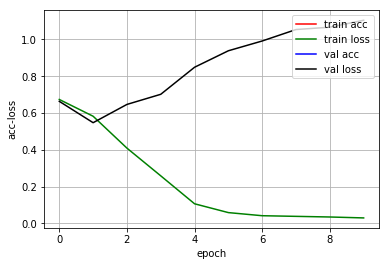

In [240]:
# Visualising the results
history.loss_plot('epoch')

In [241]:
# ***** LSTM *****
modelLSTM = Sequential() 
modelLSTM .add(Embedding(output_dim=32, input_dim=5000, input_length=540)) 
modelLSTM .add(Dropout(0.2)) 

In [242]:
# LSTM Layer
modelLSTM .add(LSTM(32)) 

# Hidden Layer
modelLSTM .add(Dense(units=256,activation='relu')) 
modelLSTM .add(Dropout(0.2))

# Output Layer
modelLSTM .add(Dense(units=1,activation='sigmoid'))

In [243]:
modelLSTM .summary()
modelLSTM.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy']) 

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 540, 32)           160000    
_________________________________________________________________
dropout_18 (Dropout)         (None, 540, 32)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_17 (Dense)             (None, 256)               8448      
_________________________________________________________________
dropout_19 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 1)                 257       
Total params: 177,025
Trainable params: 177,025
Non-trainable params: 0
_______________________________________________

In [244]:
lstm_train_history = modelLSTM.fit(x_train,y_train,epochs=10,batch_size=100,verbose=2,validation_split=0.2,callbacks=[history])

D:\anaconda\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 3989 samples, validate on 998 samples
Epoch 1/10
 - 37s - loss: 0.6776 - accuracy: 0.5956 - val_loss: 0.6667 - val_accuracy: 0.5922
Epoch 2/10
 - 31s - loss: 0.5740 - accuracy: 0.6969 - val_loss: 0.5674 - val_accuracy: 0.7144
Epoch 3/10
 - 37s - loss: 0.3709 - accuracy: 0.8411 - val_loss: 0.6252 - val_accuracy: 0.7084
Epoch 4/10
 - 32s - loss: 0.2562 - accuracy: 0.8992 - val_loss: 0.7730 - val_accuracy: 0.6653
Epoch 5/10
 - 36s - loss: 0.1775 - accuracy: 0.9366 - val_loss: 0.9463 - val_accuracy: 0.6814
Epoch 6/10
 - 35s - loss: 0.1272 - accuracy: 0.9556 - val_loss: 0.9925 - val_accuracy: 0.6924
Epoch 7/10
 - 36s - loss: 0.1051 - accuracy: 0.9687 - val_loss: 1.1272 - val_accuracy: 0.6764
Epoch 8/10
 - 32s - loss: 0.0664 - accuracy: 0.9817 - val_loss: 1.3111 - val_accuracy: 0.6874
Epoch 9/10
 - 32s - loss: 0.0512 - accuracy: 0.9865 - val_loss: 1.4783 - val_accuracy: 0.6703
Epoch 10/10
 - 33s - loss: 0.0462 - accuracy: 0.9875 - val_loss: 1.4127 - val_accuracy: 0.6713


In [245]:
scores = modelLSTM .evaluate(x_test, y_test,verbose=1)

1247/1247 [==============================] - 3s 2ms/step


In [246]:
scores

[2.665793471080165, 0.47874900698661804]

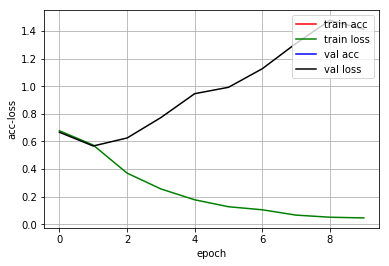

In [247]:
# Visualising the results
history.loss_plot('epoch')